In [54]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Opening up file containing GWAS data and reading in

file = open("GWAS_Add.raw", "r")
lines = file.readlines()

In [5]:
# Loading GWAS data into DF in the correct format

columns = lines[0].strip("\n").split(" ")
columns = [n.split("_", 1)[0] for n in columns]
df = pd.DataFrame(columns=columns)

data = []
for line in lines[1:]:
    newRow = line.strip("\n").split(" ")
    data.append(newRow)

df = pd.DataFrame(data, columns=columns)

In [6]:
df.shape

(89, 83540)

In [7]:
df.columns

Index(['FID', 'IID', 'PAT', 'MAT', 'SEX', 'PHENOTYPE', 'rs6681049',
       'rs4074137', 'rs7540009', 'rs1891905',
       ...
       'rs131817', 'rs131794', 'rs12157953', 'rs5770913', 'rs131750',
       'rs2269380', 'rs6151412', 'rs11912064', 'rs1001469', 'rs756638'],
      dtype='object', length=83540)

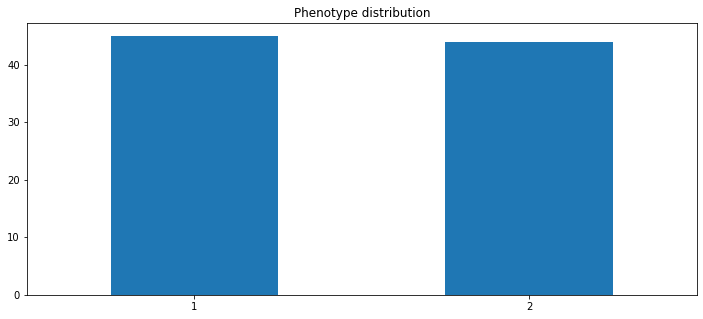

In [10]:
df["PHENOTYPE"].value_counts(dropna=False).plot(kind="bar", title="Phenotype distribution", figsize=(12,5), rot=0)
plt.show()

<AxesSubplot:title={'center':'Phenotype distribution'}>

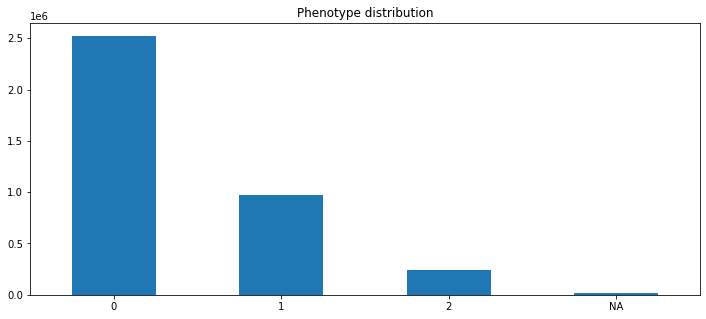

In [61]:
dfControl = df[df["PHENOTYPE"] == "1"].loc[:, 'rs6681049':'rs756638'].apply(pd.Series.value_counts).replace(np.nan, 0)
dfControl.T.sum(axis=0).plot(kind="bar", title="Phenotype distribution", figsize=(12,5), rot=0)

In [63]:
dfControl.T.sum(axis=0)

0     2521944.0
1      976909.0
2      238943.0
NA      21234.0
dtype: float64

<AxesSubplot:title={'center':'Phenotype distribution'}>

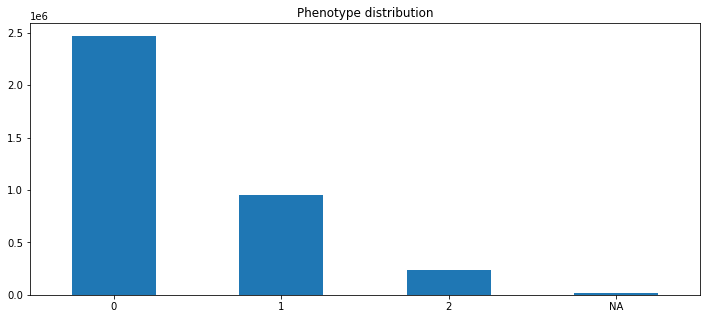

In [62]:
dfCase = df[df["PHENOTYPE"] == "2"].loc[:, 'rs6681049':'rs756638'].apply(pd.Series.value_counts).replace(np.nan, 0)
dfCase.T.sum(axis=0).plot(kind="bar", title="Phenotype distribution", figsize=(12,5), rot=0)

In [64]:
dfCase.T.sum(axis=0)

0     2470947.0
1      949420.0
2      234803.0
NA      20326.0
dtype: float64